# Introduction

This notebook provides infomation about Customer segmentation and useful marketing strategy

In the dataset, there are 18 columns and 8950 rows. Moreover, it contains comprehensive information about credit card usage behavior



In [1]:
from IPython.core.display import display, HTML, Javascript

def ApplyCustomCSS():
    return HTML("<style>"+open("../input/customcss/custom_kaggle_forCommit.css", "r").read()+"</style>")

ApplyCustomCSS()

## Import crucial library

In [2]:
import numpy as np # linear algebra operations
import pandas as pd # data processing, dataframe
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # charts, diagrams and powerful reports
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings(action="ignore")

## Import dataset

In [3]:
# fetch the data and read it as dataframe
data = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
display(data.shape)
data.head()

(8950, 18)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

#### Descriptive Statistics 

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


It's clear that outliers are existed in most of the columns

#### Summary information about data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 Most of the columns' data tpye are namerical. In addition, there are missing values in the dataset.

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Two columns contain null values: 
* CREDIT_LIMIT just has a single non-value
* MINIMUM_PAYMENTS has 313 null values

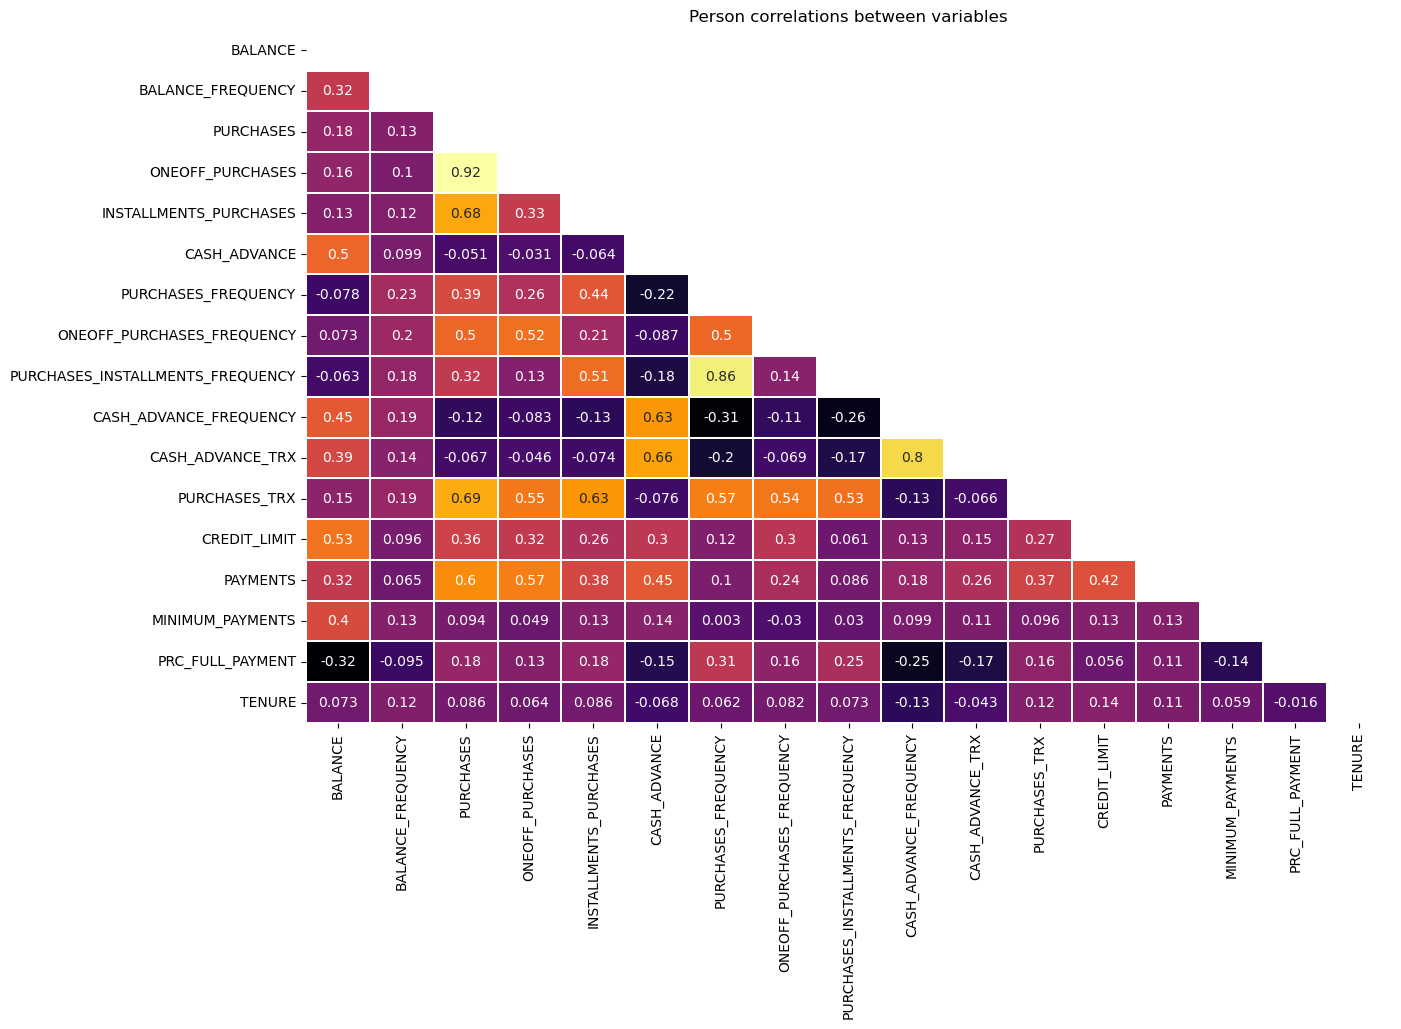

In [7]:
fig, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(data.corr(),
            mask=np.triu(np.ones_like(data.corr(), dtype=bool)), # to remove the top part of corr matrix
            annot=True,
            cmap='inferno',
            linewidths=0.1,
            cbar=False,
            annot_kws={"size":10})
plt.title('Person correlations between variables');

There are storng corrilations between some variables
* The relationship between PURCHASES and ONEOFF_PURCHASES is vary strong 
* The relationship between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY is quite strong

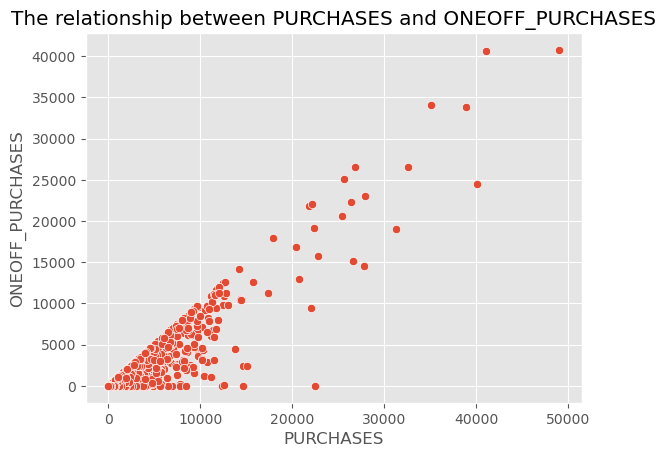

In [8]:
plt.style.use('ggplot')# a better style for plotting
sns.scatterplot(data,
                x=data["PURCHASES"],
                y=data["ONEOFF_PURCHASES"])
plt.title("The relationship between PURCHASES and ONEOFF_PURCHASES");

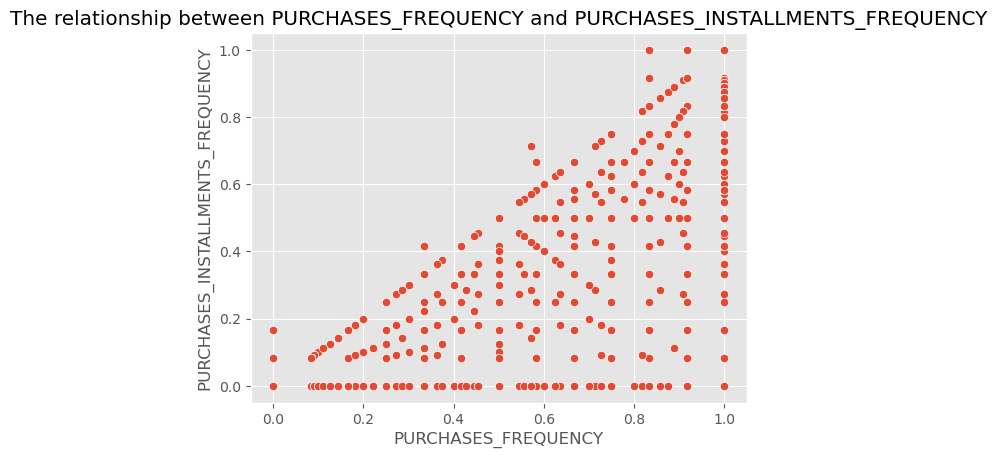

In [9]:
sns.scatterplot(data,
                x=data["PURCHASES_FREQUENCY"],
                y=data["PURCHASES_INSTALLMENTS_FREQUENCY"])
plt.title("The relationship between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY");

# Data Preprocessing

#### Remove unnecessary columns

In [10]:
removed_data = data.drop("CUST_ID", axis=1)

#### Missing values processing

In [11]:
imputer = KNNImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(removed_data),
                            columns=removed_data.columns)

I filled missing values by using KNNImputer which is a machine learning model that use KNearstneighbor alogorithm to predict the null values

#### Scaling

In [12]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(imputed_data),
                           columns=imputed_data.columns)

#### PCA

In [13]:
pca = PCA(n_components=2)
two_dim_data = pca.fit_transform(np.asarray(scaled_data))

* PCA is an unsupervised machine learning algorithm that reduces a number of the features in the dataset.
* It is used to decrease a number of the features to just two features.

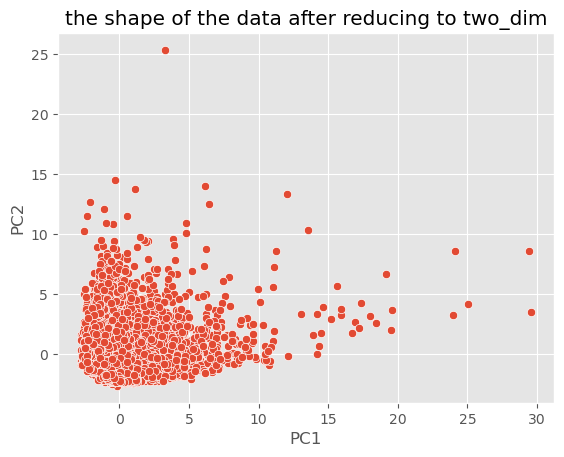

In [14]:
sns.scatterplot(x=two_dim_data[:, 0], y=two_dim_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("the shape of the data after reducing to two_dim");

* Our dataset after apply PCA on it.
* It is clear that there are some outliars.

#### Outliars processing

In [15]:
two_dim_df = pd.DataFrame(two_dim_data, columns=["PC1", "PC2"])
two_dim_df = two_dim_df[two_dim_df["PC1"]<20]
two_dim_df = two_dim_df[two_dim_df["PC2"]<15]

According to the scatterplot above, we can say all point greater than 15 or on the left of 20 are outliers

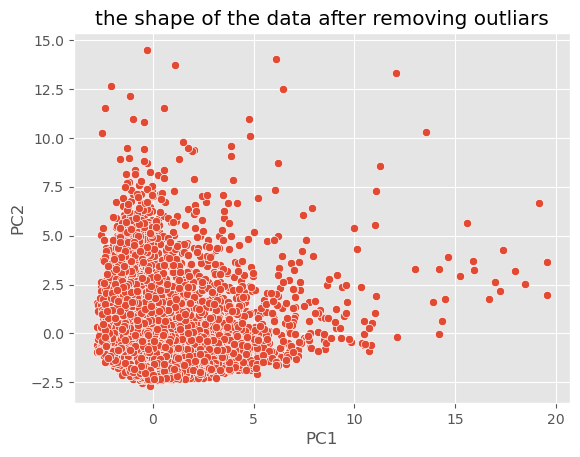

In [16]:
sns.scatterplot(x=two_dim_df["PC1"], y=two_dim_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("the shape of the data after removing outliars");

the data after removing outliers

# Data Modeling

In [17]:
distortions = []
inertias = []
silhouette = []

K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(two_dim_df)
  
    distortions.append(sum(np.min(cdist(two_dim_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / two_dim_df.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    silhouette.append(silhouette_score(two_dim_df, kmeanModel.labels_))
  

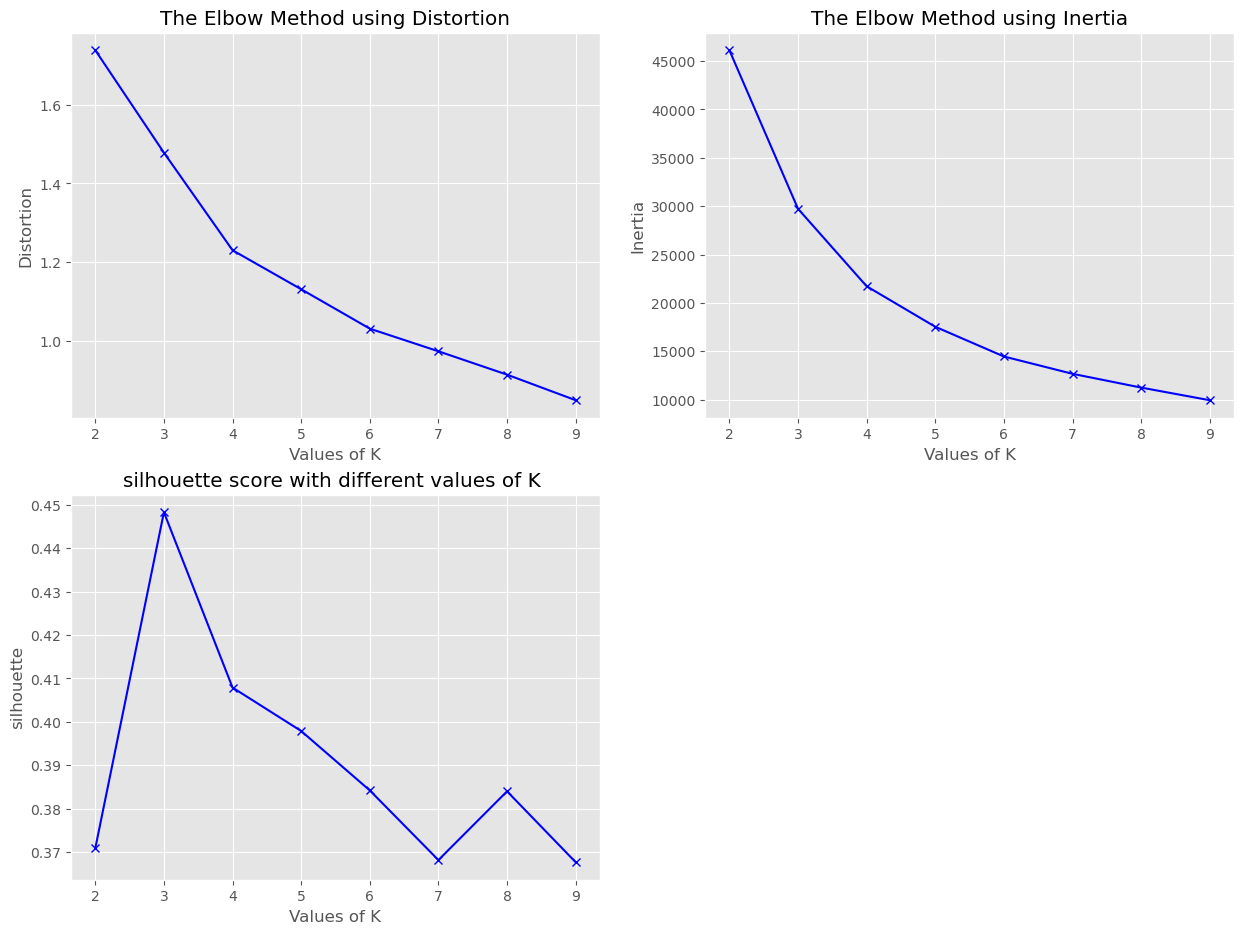

In [18]:
plt.figure(figsize=(15, 11))
plt.subplot(2, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')

plt.title('The Elbow Method using Distortion')

plt.subplot(2, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.subplot(2, 2, 3)
plt.plot(K, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('silhouette score with different values of K ')
plt.show()

We have here three metrics to gain the best value of k:
1. Distortion
2. Inertia
3. silhouette score
**Distortion** and **Inertia** illustrate that k=4 is best value ,whereas **silhouette score** shows that k=3 is best.

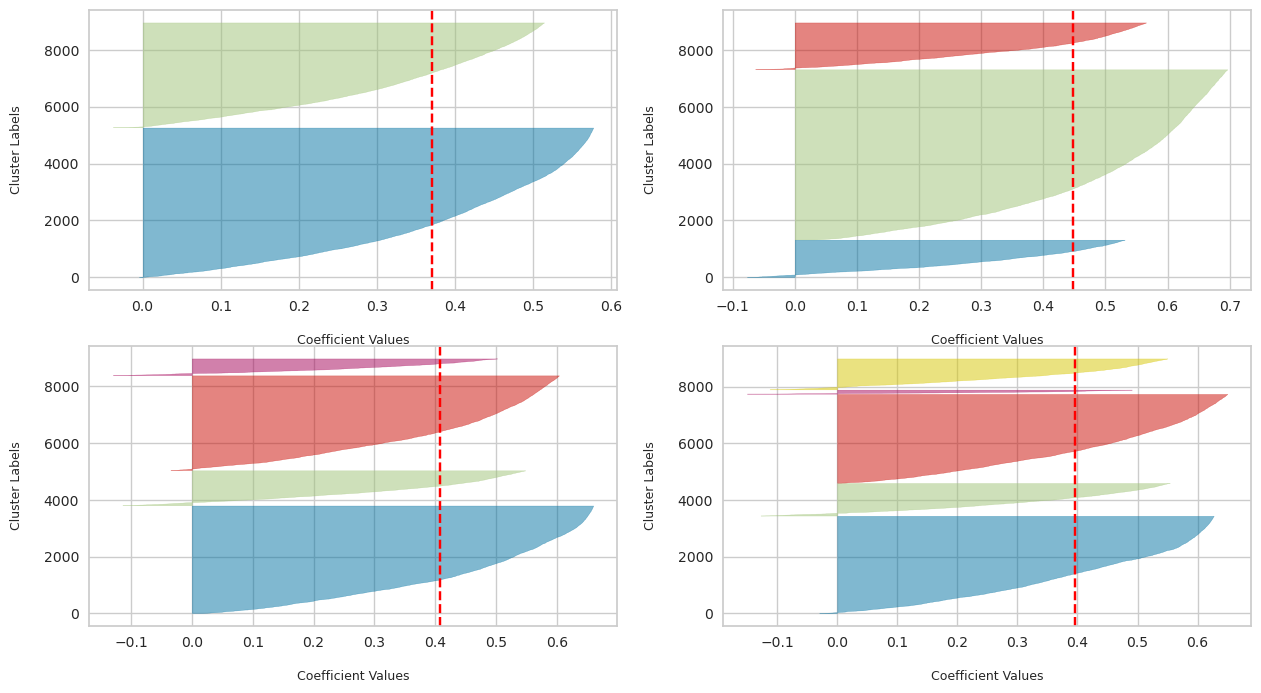

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(np.asarray(two_dim_df))
    
    visualizer.ax.set_xlabel('\nCoefficient Values', fontsize=9)
    visualizer.ax.set_ylabel('Cluster Labels\n', fontsize=9)

Also the Silhouette plot above illustrate that k = 4 is the optimal value

# The final result

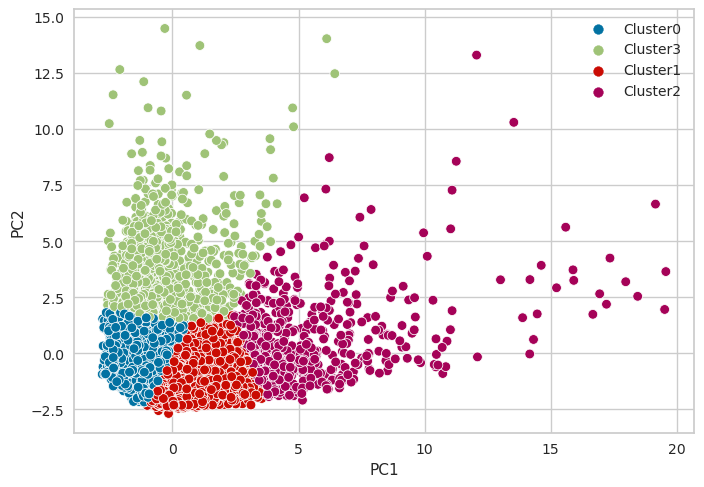

In [20]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_Kmeans= kmeans.fit_predict(two_dim_df)
y_label = pd.DataFrame(y_Kmeans).replace({0:"Cluster0",1:"Cluster1",2:"Cluster2",3:"Cluster3"}).to_numpy().flatten()
sns.scatterplot(two_dim_df,x="PC1", y="PC2", hue=y_label)
plt.show()